# Linear Algebra on Pytorch 

-Professor: Dr. Saul Calderon.


## Install Dependencies

In [0]:
# Since Collab is being used, it is necessary to install Pytorch
!pip install torch
import torch as torch

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm




# Tensor basics

In [3]:
import torch
  
#Select device
device = torch.device("cpu") 
# device = torch.device("cuda:0")


#create literal tensors
w = torch.tensor([1, 2, 3], device = device)

v = torch.tensor([5, 6, 7], device = device)

print("v shape ", v.shape)

print("v \n", v)

v shape  torch.Size([3])
v 
 tensor([5, 6, 7])


In [6]:
#save into numpy array
v_np = v.numpy()
print("v_np ", v_np)
v_list = v_np.tolist()
print("v_list ", v_list)

v_np  [5 6 7]
v_list  [5, 6, 7]


In [16]:
#tipos de tensores
a = torch.tensor([1, 2])
print("tipo de a ", a.dtype)
b = torch.tensor([2, 1])
c = a.dot(b)
print("c ", c.item())

tipo de a  torch.int64
c  4


# Initializing vectors

In [22]:
#valores aleatorios de 0 a 1
v_rand = torch.rand(5)
print("v_rand ", v_rand)

v_rand_int = torch.randint(low = 2, high = 5, size = (1, 5))
print("v_rand_int ", v_rand_int)

v_rand  tensor([0.5188, 0.6675, 0.0320, 0.1136, 0.2700])
v_rand_int  tensor([[2, 3, 2, 2, 2]])


## Dot product

Dot product between vectors  and vectors $w \in \mathbb{R}^{1\times3}$ and $v \in \mathbb{R}^{1\times3}$, is calculated as follows:

In [0]:
#def calculateAngleVectors(w, v):
 
#create an array with values between X and Y, with a step of D
series = torch.arange(-1.0, 1.0, 0.01)




#.0 to ensure float tensors
a = torch.tensor([1.0, 0.0])
b = torch.tensor([0.0, 1.0])
#calculate angle between vectors
#angle = calculateAngleVectors(a, b)
#print("Angle between vectors: ", angle)

#random numbers
y = torch.randn(1, 3, dtype = torch.float)
#vector of ones
x = torch.ones(1,3, dtype = torch.float)

#to get tensor dimensions, we use shape
print(w.shape)
#Dot product
dotProduct = w.dot(v)
print("Dot product: ", dotProduct)
print(y)

torch.Size([3])
Dot product:  tensor(38)
tensor([[ 0.1885,  0.1667, -0.1377]])


v = torch.tensor([1.0, 2.0, 4.0])
a = torch.tensor([2.0, 2.0, 2.0])
w = torch.randn(1, 3)
c = v * a
serie = torch.arange(-1.0, 1.0, 0.1)
print(c)
print(c.shape)

# Dot product: properties verification

## Conmutativity of the dot product

In [2]:
import torch

def verify_conmutativity(n = 5, epsilon = 0.0001):
    #generate two random vectors
    #verify conmutativity
    #return true or false depending on the result of the verification
    v_rand_A = torch.rand(n) 
    v_rand_B = torch.rand(n) 
    print("v_rand_A ", v_rand_A)
    print("v_rand_B ", v_rand_B)
    res1 = v_rand_A.dot(v_rand_B) 
    res2 = v_rand_B.dot(v_rand_A) 
    print("res1 ", res1)
    print("res2 ", res2)
    if(abs(res1 - res2) < epsilon): 
        return True 

    else: 
        return False 
    
verify_conmutativity(n = 3)

v_rand_A  tensor([0.5313, 0.2757, 0.9403])
v_rand_B  tensor([0.7982, 0.7888, 0.1070])
res1  tensor(0.7422)
res2  tensor(0.7422)


True

# Associativity demonstration

In [3]:
def verify_associativity(n = 5, epsilon = 0.00001):
    vec_a = torch.rand(n)
    vec_b = torch.rand(n)
    vec_c = torch.rand(n)
    temp_li = vec_c.dot(vec_a)
    print("temp_li ", temp_li)
    res_li = temp_li.dot(vec_b)
    
verify_associativity()

temp_li  tensor(0.5402)


RuntimeError: 1D tensors expected, but got 0D and 1D tensors

In [4]:
def change_of_order_verification(n = 3):
    vec_a = torch.rand(n)
    vec_b = torch.rand(n)
    vec_c = torch.rand(n)
    vec_d = torch.rand(n)
    #lado izquierdo
    li = vec_a.dot(vec_b) * vec_c.dot(vec_d)
    #lado derecho
    ld = vec_a.dot(vec_c) * vec_b.dot(vec_d)
    print("li ", li)
    print("ld ", ld)
    
change_of_order_verification()

li  tensor(0.4072)
ld  tensor(0.5368)


# Vector norms

In [12]:
def lp_norm(v, p = 1):
    v_abs = torch.abs(v)    
    v_power = v_abs ** p    
    v_sum = v_power.sum() ** (1 / p)    
    return v_sum
    
v = torch.tensor([-3.0, -9])


v_norm_a_pie = lp_norm(v, p = 2)
v_norm_libreria = torch.norm(v, 2)
print("v_norm_a_pie ", v_norm_a_pie)
print("v_norm_libreria ", v_norm_libreria)

v_norm_a_pie  tensor(9.4868)
v_norm_libreria  tensor(9.4868)


In [16]:
def lp_norm_inf(v):
    v_abs = torch.abs(v)    
    comp_max = torch.max(v_abs)
    return comp_max


v = torch.tensor([-3.0, -9])

v_norm_libreria = torch.norm(v, torch.inf)
v_norm_a_pi = lp_norm_inf(v)

print("v_norm_libreria ", v_norm_libreria)
print("v_norm_a_pi ", v_norm_a_pi)

v_norm_libreria  tensor(9.)
v_norm_a_pi  tensor(9.)


## Sum, substraction, element wise division and multiplication of vectors

In [4]:
import torch as torch

device = torch.device("cpu") 
# device = torch.device("cuda:0")
#torch.long and torch.float are the main tensor types
a = torch.tensor([-5, 7], dtype = torch.float)
b = torch.tensor([2, 1])
print("a", a)
print("type tensor a", a.dtype)
print("type tensor b", b.dtype)
#sum of vectors
c = a + b
print("sum: ", c, " dtype ", c.dtype)

a tensor([-5.,  7.])
type tensor a torch.float32
type tensor b torch.int64
sum:  tensor([-3.,  8.])  dtype  torch.float32


In [7]:
d = a - b

print("substraction result d \n", d)

#magnitud de la diferencia entre vectores
mag_d = torch.norm(a - b, 2)
print("mag_d ", mag_d.item())

substraction result d 
 tensor([-7.,  6.])
mag_d  9.219544410705566


In [ ]:

#substraction of vectors
d = a - b
print("subs: ", d)
#element wise division of vectors
e = a / b
print("elem. wise div.: ", e)
#element wise multiplication of vectors
f = a * b
print("elem. wise mult.: ", f)
#abs of vector
g = torch.abs(a)
print(g)
#concat vectors
vec_cat = torch.cat((a, b), dim = 0)
print("concatenated vec: ", vec_cat)

# Vector indexing

In [15]:
x = torch.arange(-1.0, 1.0, 0.1)
print("x \n", x)

# y = f(x) = 5x + 3
y = 5 * x + 3
#slicing indexing
y_band = y[0:5]
print("y_band ", y_band)


#Logic indexing
#create an index vector
index_x = x > 0
print("index_x \n", index_x)
y_band_2 = y[(x > 0) & (y > 4)]
print("y_band_2 \n", y_band_2)


x 
 tensor([-1.0000e+00, -9.0000e-01, -8.0000e-01, -7.0000e-01, -6.0000e-01,
        -5.0000e-01, -4.0000e-01, -3.0000e-01, -2.0000e-01, -1.0000e-01,
        -2.9802e-09,  1.0000e-01,  2.0000e-01,  3.0000e-01,  4.0000e-01,
         5.0000e-01,  6.0000e-01,  7.0000e-01,  8.0000e-01,  9.0000e-01])
y_band  tensor([-2.0000, -1.5000, -1.0000, -0.5000,  0.0000])
index_x 
 tensor([False, False, False, False, False, False, False, False, False, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True])
y_band_2 
 tensor([4.5000, 5.0000, 5.5000, 6.0000, 6.5000, 7.0000, 7.5000])


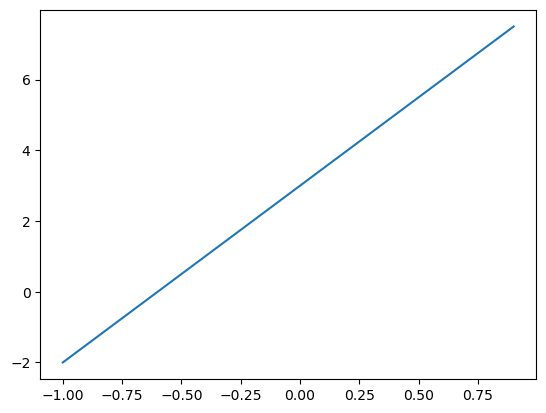

In [17]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.show()

# Vectorial indexing

In [18]:
x = torch.tensor([1, 4, 20, 8, 2])
x_1_indexed = x[torch.tensor([0, 2, 4])]
print("x_1_indexed ", x_1_indexed)


x_1_indexed  tensor([ 1, 20,  2])


# Vector plotting

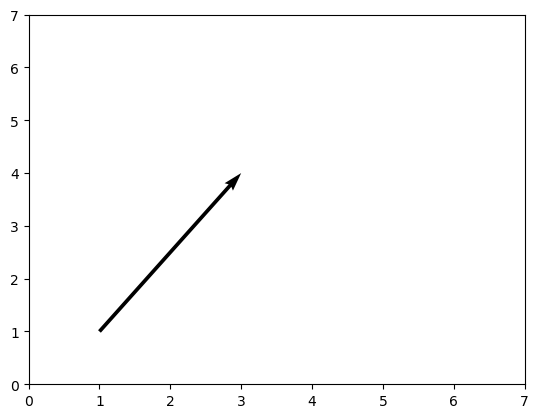

In [19]:
import torch

x = torch.tensor([2, 3])

import matplotlib.pyplot as plt

plt.quiver(1, 1, x[0], x[1], angles='xy', scale_units='xy', scale=1)
plt.xlim(0, 7)
plt.ylim(0, 7)
plt.show()

## Plot Hiperplane

To plot hiperplane given with input $\vec{x}, \vec{m}  \in \mathbb{R}^{3} $, including the bias


$$
 z = f(\vec{x}) = \vec{m} \cdot \vec{x}  $$

In [26]:
figure = plt.figure()

#create 1D tensors
step = 0.01
x_1 = torch.arange(0.0, 5.0, step)
x_2 = torch.arange(0.0, 6.0, step)
#Create 2D tensors with variation along the two axis
X_1, X_2 = torch.meshgrid(x_1, x_2)

#print("X_1 \n", X_1)
#print("X_2 \n", X_2)

#compute hiperplane function
Y = -5 * X_1 + 2 * X_2

#print("Y  \n", Y)

<Figure size 640x480 with 0 Axes>

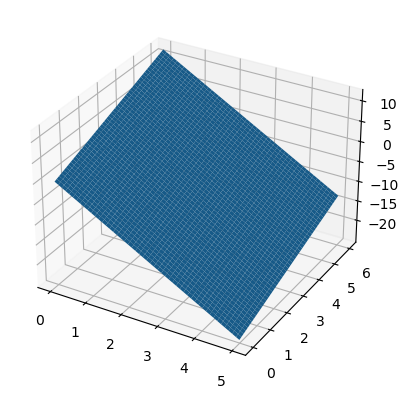

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_1.numpy(), X_2.numpy(), Y.numpy())
plt.show()

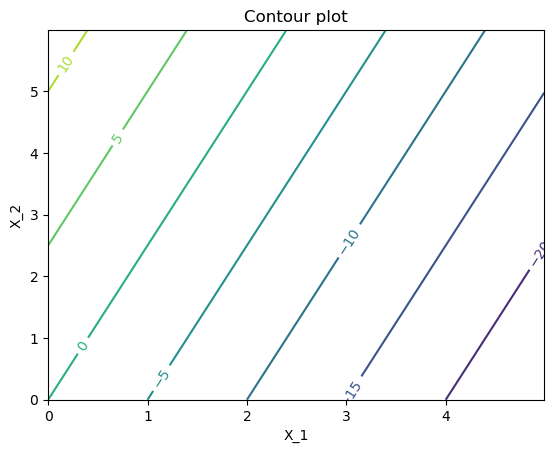

In [28]:


# Provide a title for the contour plot
plt.title('Contour plot')
# Set x axis label for the contour plot
plt.xlabel('X_1')
# Set y axis label for the contour plot
plt.ylabel('X_2')
# Create contour lines or level curves using matplotlib.pyplot module
contours = plt.contour(X_1.numpy(), X_2.numpy(), Y.numpy())
# Display z values on contour lines
plt.clabel(contours, inline=1, fontsize=10)
# Display the contour plot
plt.show()

## Gradient of plane calculation

In [0]:
# we need to divide by the step
(dX, dY) = np.gradient(Z.numpy()) 
dX = dX / step
dY = dY / step
print(dX)

[[2.0999908 2.0999908 2.0999908 ... 2.0999908 2.0999432 2.0999908]
 [2.1000028 2.1000028 2.1000028 ... 2.099967  2.099967  2.0999908]
 [2.1000028 2.1000028 2.1000028 ... 2.1000147 2.1000385 2.0999908]
 ...
 [2.0999908 2.0999908 2.0999908 ... 2.0999908 2.0999908 2.0999908]
 [2.0999908 2.0999908 2.0999908 ... 2.0999908 2.0999908 2.0999908]
 [2.0999908 2.0999908 2.0999908 ... 2.0999908 2.0999908 2.0999908]]


## Vector plotting
To plot a vector, we need to transform the pytorch tensors to numpy arrays, since most libraries use numpy. 
We build a matrix with a vector per row

[[2.10000277 0.99999905]]


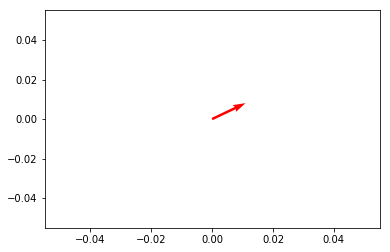

In [0]:

gradientVector = np.ones((1, 2))
#take the gradient vector at 1,1 in the gradient matrix
gradientVector[0, 0] = dX[1, 1]
gradientVector[0, 1] = dY[1, 1]
#gradient vector taken
print(gradientVector)

origin = [0] # origin point
#plot the 2D gradient vector
plt.quiver(origin, origin, gradientVector[:,0], gradientVector[:,1], color=['r','b','g'], scale=21)
plt.show()

##Porting vectors (1D tensors) to matrices (2D tensors)

We usually work with 2D tensors, thus is frequent to convert them to 2d tensors:

In [0]:
#row vector in 2D tensor
w2Drow = w.reshape(-1, w.shape[0])
#column vector in 2D tensor, -1 for n rows or columns
v2Dcolumn = v.reshape(v.shape[0], -1)
print(w2Drow)
print(v2Dcolumn)




## Element wise multiplication of matrices, and dot product of matrices
The dot product between to matrices $A\in \mathbb{R}^{2\times2}$ and $B \in \mathbb{R}^{2\times2}$, and

The element wise multiplication of matrices A and B result in a matrix C with same dimensions, and multiplies its entries.


In [0]:
A = torch.tensor([[1, 2], [3, 0]])
B = torch.tensor([[5, 6], [7, 0]])
C = A * B
print(C)
#Element wise multiplication allows us to calculate dot product of matrices
dotProduct = C.sum()
print("Dot product: ", dotProduct)

tensor([[ 5, 12],
        [21,  0]])
Dot product:  tensor(38)


## Auto grad in Pytorch

In [2]:
import torch
#x = Variable(torch.tensor[1.0], requires_grad=True); 
x = torch.tensor([1.0], requires_grad=True)
y = 3*x**2
y.backward()
print("Gradient ", x.grad)

Gradient  tensor([6.])


# Tests

In [5]:
x = -2
y = -3
df_dx = 2*(1.5 - x + x*y)*(-1 + y) + 2*(2.25 - x + x * y ** 2) * (-1 + y ** 2) + 2*(2.625 - x + x*y ** 3) * (-1 + y ** 3) 
print("df_dx ", df_dx)

df_dy = 2*(1.5 - x + x * y)*x + 4 * (2.25 - x + x * y ** 2)*x * y + 6 * (2.625 - x + x * y ** 3) * x * y ** 2 

print("df_dy ", df_dy)

df_dx  -3579.0
df_dy  -6699.5


In [9]:
import torch


def get_angle(x):
    theta = torch.arctan(x[1] / x[0])
    print("theta ", theta)

x = torch.tensor([-14, -13])
get_angle(x)

x = torch.tensor([-84, -78])
get_angle(x)


theta  tensor(0.7484)
theta  tensor(0.7484)
